Lớp tích chập tạo ra 1 cửa sổ (kernel) trượt trên 1 bức ảnh bất kì và trích xuất những đặc trưng quan trọng của ảnh đó tạo thành 1 ảnh mới, ví dụ ta có 4 hình ảnh của 1 con mèo nằm ở 4 góc, thì lớp tích chập này sẽ trích xuất đặc trưng quan trọng nhất của ảnh (là con mèo), và tạo thành 4 ảnh mới chứa đặc trưng đó.
Đây là 1 tiến trình SONG SONG, không phải Sequential (tuần tự) như trên hình minh họa. Vì thế mạng CNN tiến hành nhanh hơn rất nhiều so với RNN.

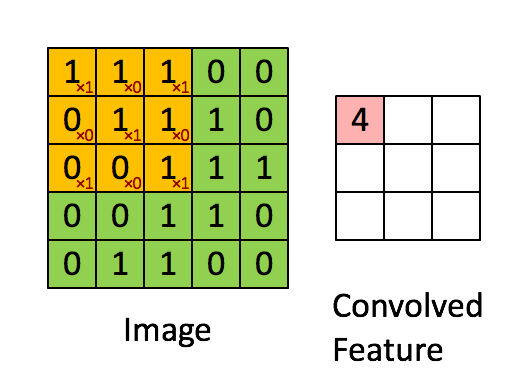

Có 2 mẫu kernel phổ biến: SobelX và SobelY. SobelX trính xuất những đặc trưng theo chiều dọc, SobelY trích xuất những đặc trưng theo chiều ngang.
Bản chất trong mạng học sâu, chúng ta sẽ không định nghĩa trước những giá trị của kernel, máy tính sẽ tự định nghĩa những giá trị này dựa trên LossFunction để trích xuất những đặc trưng này một cách hiệu quả nhất.
Nhưng trong bài này, chúng ta sẽ định nghĩa nhứng giá trị này trước và chúng ta sẽ xử lí 1 ảnh để đưa ra những đặc trưng của ảnh đó.
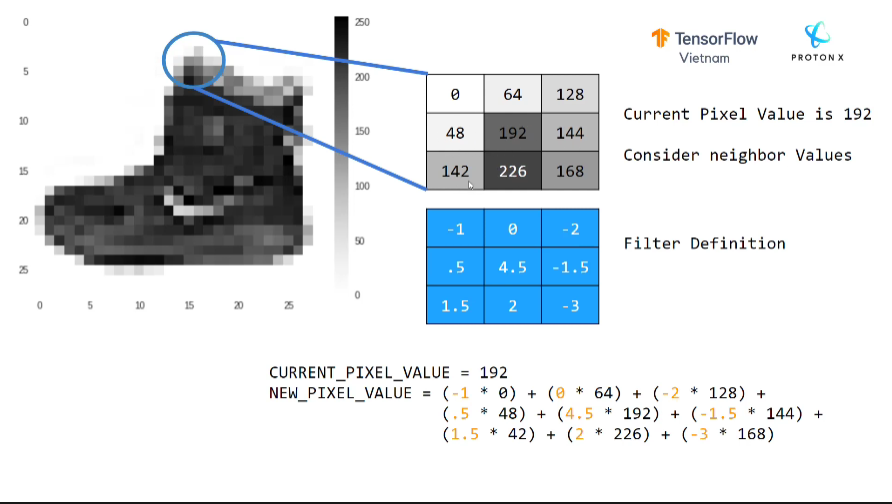

In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9675 sha256=ef266246fd71ec226e86b4c378ca8f416d435dd353eedb0a225d4e94929a4f6b
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import wget
import matplotlib.pyplot as plt


In [3]:
wget.download("https://cdn.shopify.com/s/files/1/1297/3303/products/20-vinyl-roll-up-chess-board-21184102209_grande.jpg?v=1575932012")

'20-vinyl-roll-up-chess-board-21184102209_grande.jpg'

In [4]:
import cv2

In [5]:
image = cv2.imread("20-vinyl-roll-up-chess-board-21184102209_grande.jpg")

In [6]:
grey_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

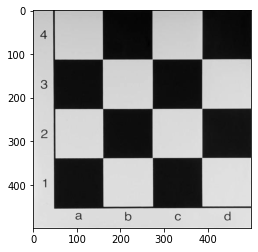

In [7]:
plt.gray()
plt.imshow(grey_img)

In [8]:
sobelX = [[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
sobelY = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

In [9]:
def getCoord(kernel):
  center_filter = [1, 1]
  xRows = [0, 0, 1, -1, 1, -1, 1, -1]
  yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
  for k in range(8):
    pixel_in_filter_x = center_filter[0] + xRows[k]
    pixel_in_filter_y = center_filter[1] + yCols[k]
    print("(cor {}, {}) - value: {}".format(pixel_in_filter_x, pixel_in_filter_y, kernel[pixel_in_filter_x][pixel_in_filter_y]))

Hàm getCoordinate
>Từ 1 index của 1 pixel (tức là vị trí (x, y) của 1 pixel) bất kì ta có thể tìm được index (vị trí (x, y)) của những pixel xung quanh pixel đó.
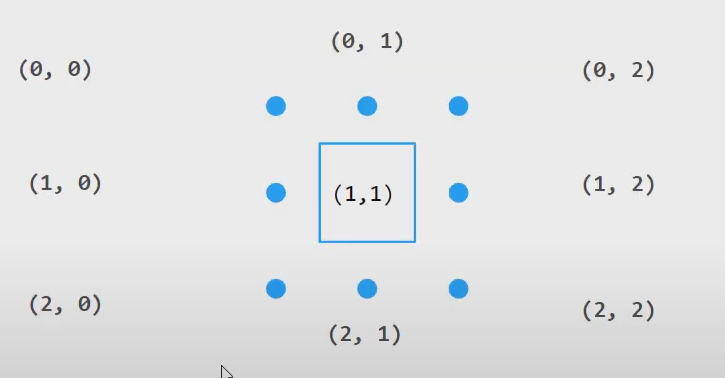

Filter của chúng ta có kích thước là 3x3, vì thế vị trí trung tâm của filter là center_filter = [1, 1]
xRows và yCols thể hiện độ chênh lệnh giữa tọa độ x và y của các vị trí xung quanh so với center.
ví dụ:
> vị trí [0, -1] tương ứng với nhau sẽ có x = 1 và y = 1 - 1 = 0, x giữ nguyên có nghĩa là cùng hàng ngang, y - 1 tức là vị trí nằm bên trái và cùng nằm 1 hàng ngang.
> vị trí [0, 1] tương ứng với nhau sẽ có x = 1 và y = 1 + 1 = 2, x giữ nguyên có nghĩa là cùng hàng ngang, y + 1 tức là vị trí nằm bên phải và cùng nằm 1 hàng ngang.

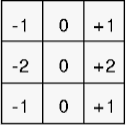

In [10]:
getCoord(sobelX)

(cor 1, 0) - value: -2
(cor 1, 2) - value: 2
(cor 2, 1) - value: 0
(cor 0, 1) - value: 0
(cor 2, 0) - value: -1
(cor 0, 0) - value: -1
(cor 2, 2) - value: 1
(cor 0, 2) - value: 1


In [11]:
import numpy as np
def conv(grey_img, kernel):
  transformed = np.copy(grey_img)
  m = transformed.shape[0]
  n = transformed.shape[1]
  print(m, n)
  for i in range(1, m - 1):
    for j in range(1, n - 1):
      center_pixel = [i, j]
      center_filter = [1, 1]
      xRows = [0, 0, 1, -1, 1, -1, 1, -1]
      yCols = [-1, 1, 0, 0, -1, -1, 1, 1]
      #print(i, j)
      new_val = 0.0
      for k in range(8):
        item = [xRows[k], yCols[k]]
        pixel_in_image_x = center_pixel[0] + item[0]
        pixel_in_image_y = center_pixel[1] + item[1]
        pixel_in_filter_x = center_filter[0] + item[0]
        pixel_in_filter_y = center_filter[1] + item[1]
        # print(pixel_in_image_x, pixel_in_image_y)
        # print(pixel_in_filter_x, pixel_in_filter_y)
        new_val = new_val + (grey_img[pixel_in_image_x, pixel_in_image_y] * kernel[pixel_in_filter_x][pixel_in_filter_y])
      new_val = new_val + grey_img[i, j] * kernel[1][1]
      if new_val < 0:
        new_val = 0
      if new_val > 255:
        new_val = 255
        
        #print(new_val)
      transformed[i, j] = new_val * 1
  return transformed

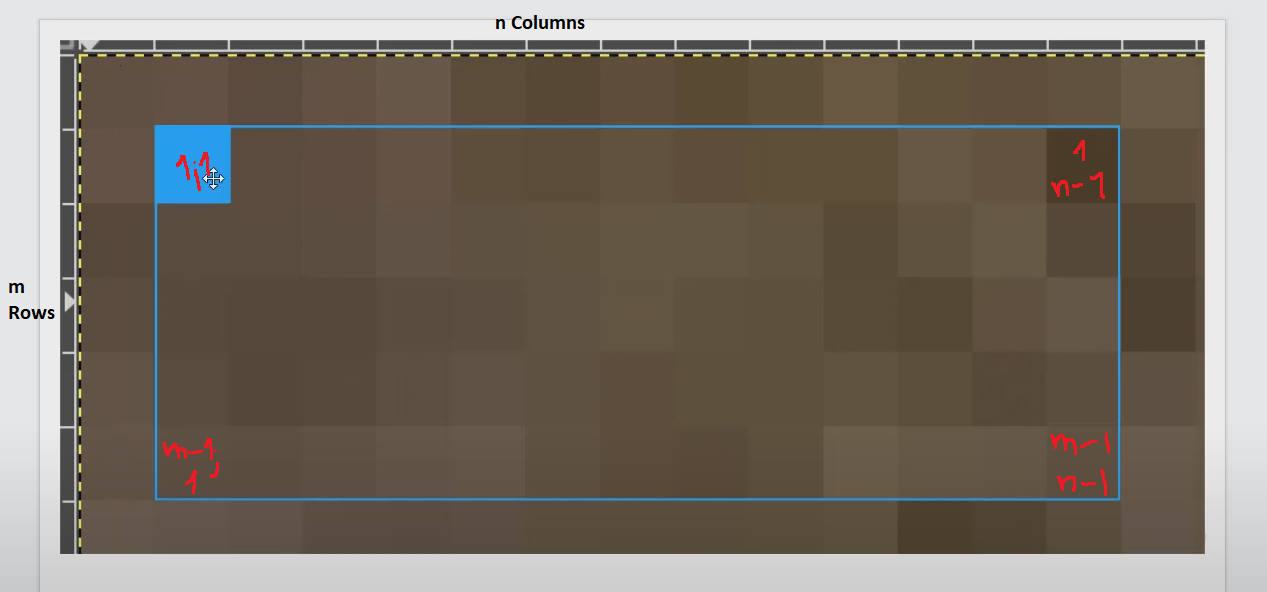

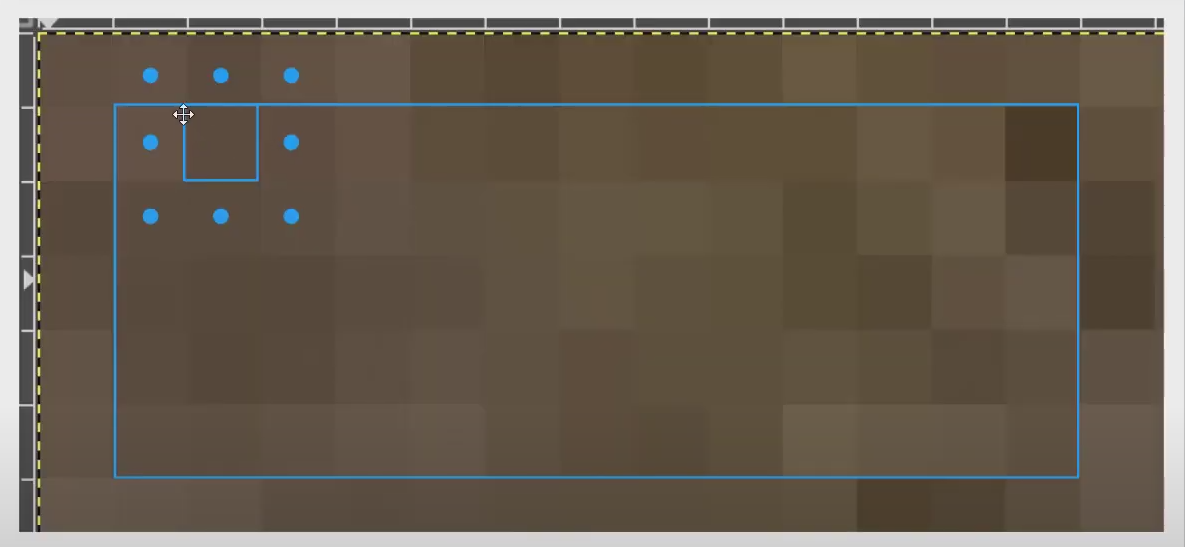

In [12]:
result1 = conv(grey_img, sobelX)

499 500


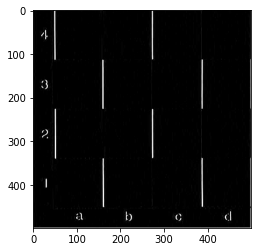

In [13]:
plt.imshow(result1)
plt.show()

In [14]:
result2 = conv(grey_img, sobelY)

499 500


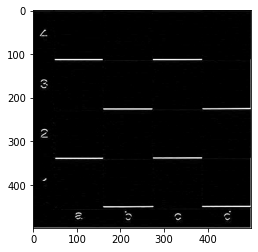

In [15]:
plt.imshow(result2)
plt.show()

***LỚP MAXPOOLING***


---



---








Lớp MaxPooling cũng giống như lớp Convolution, chỉ khác ở chỗ, lớp MaxPooling sẽ dùng kernel để quét qua ảnh và trả về giá trị lớn nhất của vị trí kernel quét qua.
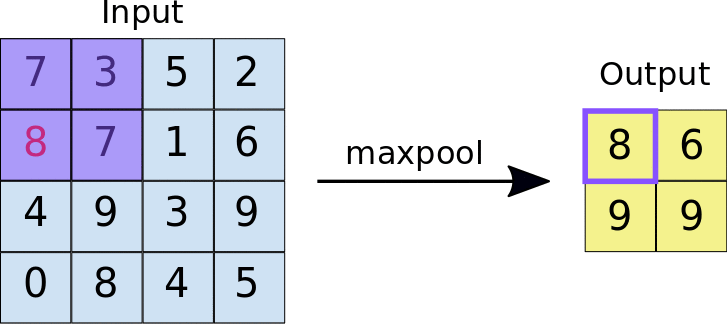

MaxPooling thường nằm ở lớp CUỐI, sau khi chúng ta thực hiện trích xuất những đặc trưng. Lớp MaxPooling sẽ trích xuất những đặc trưng LỚN NHẤT trên từng khu vực và THU NHỎ lại kích cỡ của ảnh.
> Lớp MaxPooling sẽ THU NHỎ ảnh và lấy những giá trị LỚN NHẤT và thể hiện tính đặc trưng cao nhất.


Khác với lớp Convolution, lớp MaxPooling không cần phải học trong mạng Deep Learning => số lượng Parameter = 0.
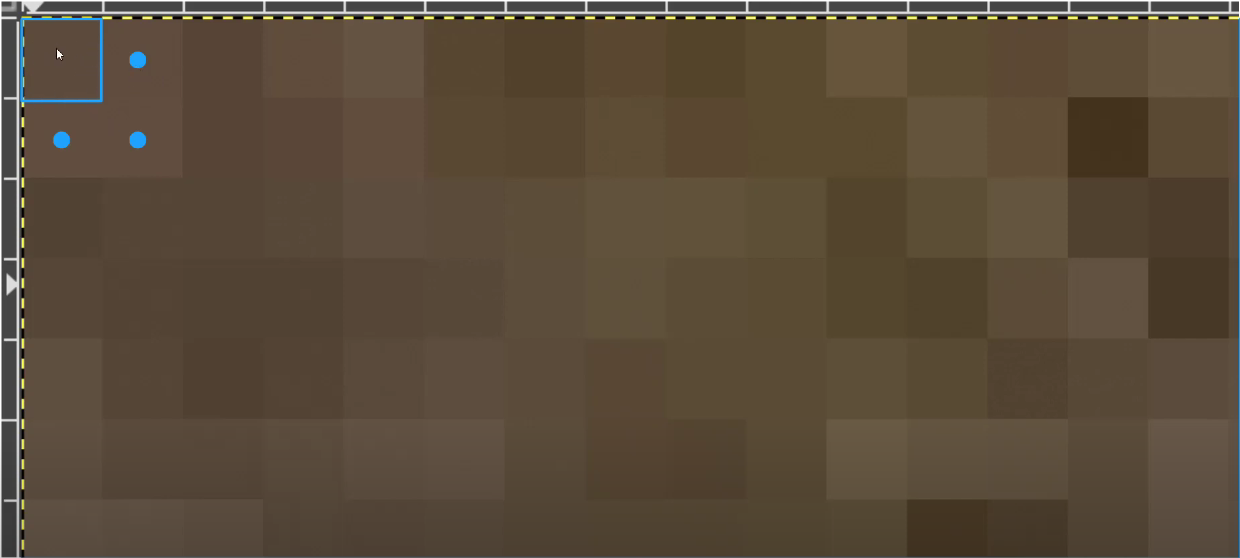


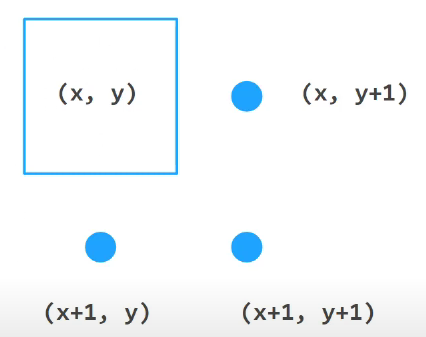

In [16]:
def maxpool(image):
  m = len(image)      #chieu cao cua anh
  n = len(image[0])   #chieu rong cua anh
  new_image = np.zeros((m//2 + 1, n//2 + 1))
  xRows = [1, 1, 0]
  yCols = [0, 1, 1]
  #cac vi tri tuong ung xung quanh (x, y), default (x, y) = (0, 0), ben duoi (x + 1, y + 0), ben phai (x + 0, y + 1), goc phai (x + 1, y + 1)
  for i in range(0, n, 2):
    for j in range(0, n, 2):
      currentPixels = [image[i][j]]
      for k in range(3):
        neighbor_x = i + xRows[k]
        neighbor_y = j + yCols[k]
        if neighbor_x < m and neighbor_y < n:
          currentPixels.append(image[neighbor_x][neighbor_y])
        new_image[i//2][j//2] = max(currentPixels)
  return new_image

In [17]:
result3 = maxpool(result1)

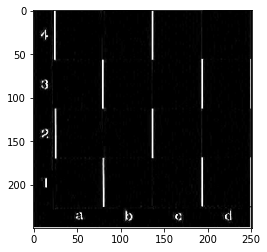

In [18]:
plt.imshow(result3)
plt.show()

Chúng ta có thể thấy mặc dù size của bức ảnh đã giảm đi một nửa, nhưng các đặc trưng hàng dọc của ảnh đã trở nên sáng hơn so với những đặc trưng của ảnh ở result1.